# Stock Forecasting using tsmoothie Part 2

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from tsmoothie.smoother import LowessSmoother
from sklearn.metrics import mean_squared_error, mean_absolute_error

import warnings
warnings.filterwarnings("ignore")

import yfinance as yf
yf.pdr_override()

In [2]:
# Download data
symbol = '^GSPC'
start = '2019-01-01'
end = '2022-07-22'
df = yf.download(symbol, start, end)

[*********************100%%**********************]  1 of 1 completed


In [3]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-02,2476.959961,2519.489990,2467.469971,2510.030029,2510.030029,3733160000
2019-01-03,2491.919922,2493.139893,2443.959961,2447.889893,2447.889893,3858830000
2019-01-04,2474.330078,2538.070068,2474.330078,2531.939941,2531.939941,4234140000
2019-01-07,2535.610107,2566.159912,2524.560059,2549.689941,2549.689941,4133120000
2019-01-08,2568.110107,2579.820068,2547.560059,2574.409912,2574.409912,4120060000


In [4]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-07-15,3818.000000,3863.620117,3817.179932,3863.159912,3863.159912,4143800000
2022-07-18,3883.790039,3902.439941,3818.629883,3830.850098,3830.850098,4046870000
2022-07-19,3860.729980,3939.810059,3860.729980,3936.689941,3936.689941,4041070000
2022-07-20,3935.320068,3974.129883,3922.030029,3959.899902,3959.899902,4185300000
2022-07-21,3955.469971,3999.290039,3927.639893,3998.949951,3998.949951,4132790000


In [5]:
# Extract the 'Close' prices from the dataframe
data = df['Close'].values.reshape(1, -1)  # Reshape to fit the model

# operate smoothing
smoother = LowessSmoother(smooth_fraction=0.1, iterations=1)
smoother.smooth(data)


<tsmoothie.smoother.LowessSmoother>

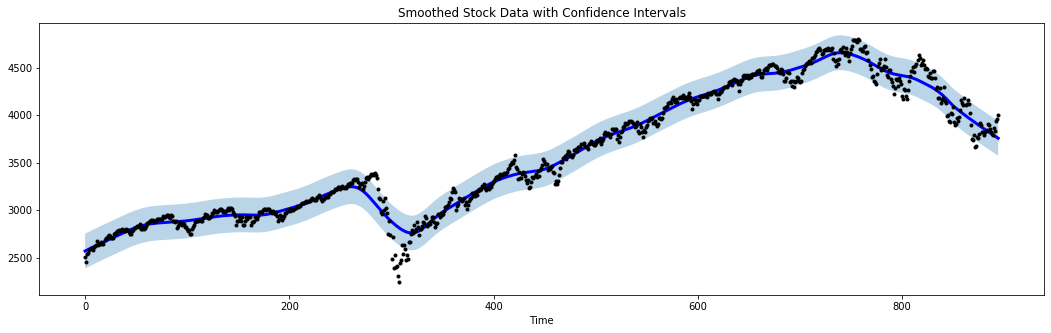

In [6]:
# generate intervals
low, up = smoother.get_intervals('prediction_interval')

# plot the smoothed timeseries with intervals
plt.figure(figsize=(18,5))

plt.plot(smoother.smooth_data[0], linewidth=3, color='blue')
plt.plot(data[0], '.k')
plt.title("Smoothed Stock Data with Confidence Intervals")
plt.xlabel('Time')
plt.fill_between(range(len(data[0])), low[0], up[0], alpha=0.3)

plt.show()

In [7]:
# Get the original data and smoothed data
original_data = data[0]
smoothed_data = smoother.smooth_data[0]

# Calculate errors
mse = mean_squared_error(original_data, smoothed_data)
mae = mean_absolute_error(original_data, smoothed_data)
rmse = np.sqrt(mse)

# Print the errors
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)

Mean Squared Error (MSE): 8649.143908291833
Mean Absolute Error (MAE): 62.99517554392996
Root Mean Squared Error (RMSE): 93.0007736972754
